<a href="https://colab.research.google.com/github/Sukyeong02/23-2-XAI/blob/main/Lecture_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

f = open('Fish.csv', 'r')
data = csv.reader(f)

header = next(data)

perch_weight = []
perch_length = []

for row in data:
    if row[0] == "Perch":
        perch_weight.append(float(row[1]))
        perch_length.append(float(row[3]))

f.close()

print('weight =', perch_weight)
print('length =', perch_length)

weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]
length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]


In [ ]:
import numpy as np

y = np.array(perch_weight)
x = np.array(perch_length)

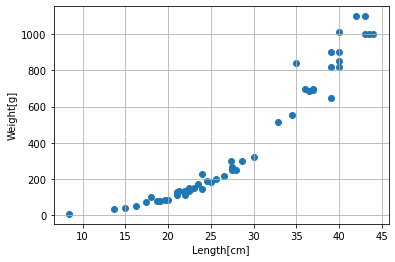

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x,y)
plt.xlabel('Length[cm]')
plt.ylabel('Weight[g]')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(42,)
(14,)


In [ ]:
x_train = x_train.reshape(42,1)
x_test = x_test.reshape(14,1)

print(x_train.shape, x_test.shape)

(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
knr.score(x_test, y_test)

0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = knr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(mae)

19.157142857142862


In [ ]:
print('시험 데이터셋에서의 결정계수:', knr.score(x_test, y_test))
print('학습 데이터셋에서의 결정계수:', knr.score(x_train, y_train))

시험 데이터셋에서의 결정계수: 0.992809406101064
학습 데이터셋에서의 결정계수: 0.9698823289099254


## 과소적합 발생 -> 모델을 더 복잡하게 만들자
- 이웃의 개수 k를 조금 줄인다.

In [ ]:
knr.n_neighbors = 3
knr.fit(x_train, y_train)
print('시험 데이터셋에서의 결정계수:', knr.score(x_test, y_test))
print('학습 데이터셋에서의 결정계수:', knr.score(x_train, y_train))

시험 데이터셋에서의 결정계수: 0.9746459963987609
학습 데이터셋에서의 결정계수: 0.9804899950518966
